# ĐỒ ÁN MÔN HỌC CUỐI KÌ
 
__TÊN MÔN HỌC:__ NHẬP MÔN KHOA HỌC DỮ LIỆU

__ĐỀ TÀI:__ ÁP DỤNG MÔ HÌNH HỌC MÁY ĐỂ DỰ ĐOÁN DOANH SỐ TRÊN SÀN THƯƠNG MẠI ĐIỆN TỬ SHOPEE

__GIẢNG VIÊN:__ TRẦN TRUNG KIÊN
 
__THỨ TỰ NHÓM:__ 15
 
__THÀNH VIÊN:__

- 18120184 - Nguyễn Nguyên Khang

- 18120189 - Trần Đăng Khoa

__PHÂN CÔNG:__

Công việc | Thực hiện | Mức độ hoàn thành
------------ | ------------- | ------------
Thu thập dữ liệu | Khang | 100%
Khám phá dữ liệu | Khang, Khoa | 100%
Tiền xử lý dữ liệu | Khang, Khoa | 100%
Mô hình hóa dữ liệu | Khang, Khoa | 100%

## Lời Cảm Ơn

Nhóm xin gửi lời cảm ơn chân thành đến: Thầy Trần Trung Kiên đã dạy và giúp đỡ chúng em hoàn thành đồ án này. Bạn Lê Hoàng Phương Nhi, bạn Lê Thị Như Quỳnh đã dành thời gian góp ý rất chi tiết cho đồ án.

# Mục lục
- [Giới thiệu đồ án](#I.-Giới-thiệu-đồ-án)
   - [Dữ liệu](#1.-Dữ-liệu)
   - [Câu hỏi](#2.-Câu-hỏi)
- [Thu thập dữ liệu](#II.-Thu-thập-dữ-liệu)
  - [Lấy dữ liệu từ Shopee bằng API](#1.-Lấy-dữ-liệu-từ-Shopee-bằng-API)
  - [Gộp dữ liệu](#2.-Gộp-dữ-liệu)
- [Khám phá dữ liệu, tiền xử lý đơn giản và tách tập](#III.-Khám-phá-dữ-liệu,-tiền-xử-lý-đơn-giản-và-tách-tập)
  - [Kiểm tra output hợp lệ](#1.-Kiểm-tra-output-hợp-lệ)
  - [Ý nghĩa của mỗi dòng](#2.-Ý-nghĩa-của-mỗi-dòng)
  - [Kiểm tra các giá trị trùng](#3.-Kiểm-tra-các-giá-trị-trùng)   
  - [Kiểm tra các giá trị không hợp lệ](#4.-Kiểm-tra-các-giá-trị-không-hợp-lệ)
  - [Xử lý dữ liệu bị lệch](#5.-Xử-lý-dữ-liệu-bị-lệch)
  - [Tách các tập](#6.-Tách-các-tập) 
- [Khám phá dữ liệu (tập huấn luyện)](#IV.-Khám-phá-dữ-liệu-(tập-huấn-luyện))
  - [Kiểm tra kiểu dữ liệu của input có phù hợp](#1.-Kiểm-tra-kiểu-dữ-liệu-của-input-có-phù-hợp)
  - [Phân bố giá trị của cột có kiểu dữ liệu dạng số](#2.-Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-dạng-số)
  - [Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số](#3.-Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-không-phải-dạng-số)
- [Tiền xử lý (tập huấn luyện)](#V.-Tiền-xử-lý-(tập-huấn-luyện))
  - [Bỏ cột](#1.-Bỏ-cột)
  - [Sửa cột](#2.-Sửa-cột)
  - [Xử lý giá trị thiếu](#3.-Xử-lý-giá-trị-thiếu)
  - [Chuẩn hóa](#4.-Chuẩn-hóa)
  - [Tạo pipeline](#5.-Tạo-pipeline)
- [Mô hình hóa dữ liệu](#VI.-Mô-hình-hóa-dữ-liệu)
  - [Tìm mô hình tốt nhất](#1.-Tìm-mô-hình-tốt-nhất)
  - [Đánh giá mô hình tìm được](#2.-Đánh-giá-mô-hình-tìm-được)
- [Nhìn lại quá trình làm đồ án](#VII.-Nhìn-lại-quá-trình-làm-đồ-án)
  - [Khó khăn](#1.-Khó-khăn)
  - [Những thứ học được](#2.-Những-thứ-học-được)
  - [Những điều cần bổ sung nếu có thêm thời gian](#3.-Những-điều-cần-bổ-sung-nếu-có-thêm-thời-gian)
- [Tài liệu tham khảo](#VIII.-Tài-liệu-tham-khảo)

## I. Giới thiệu đồ án

Mục đích chính của đồ án là xây dựng mô hình học máy để dự đoán doanh số bán hàng trên Shopee
### 1. Dữ liệu

Các món hàng _Thời trang nam_ trên Shopee

Input là các thuộc tính của món hàng mà được biểu hiện ra trên giao diện của shopee.vn cho người dùng thấy như tên sản phẩm, giá thành,... và các thuộc tính ẩn bên dưới như thời gian sản phẩm được đăng, giá cao nhất,...

Output là số lượng hàng đã bán được trong thời gian món hàng được đăng lên Shopee cho đến lúc được lấy dữ liệu về máy

Dữ liệu đúng vì được request từ API của Shopee, có nghĩa là Shopee cũng đang sử dụng dữ liệu này để hiển thị cho người tiêu dùng xem

### 2. Câu hỏi

*Output - doanh số -* được tính từ *input - các thông tin của sản phẩm -* theo công thức nào?

Cảm hứng từ thực tế các trang thương mại điện tử ngày càng phát triển và nhu cầu trao đổi, mua bán, kinh doanh trên mạng cũng ngày càng tăng lên

Vì thế, trả lời cho câu hỏi này giúp ta có những chiến lược phù hợp để nâng cao doanh số sản phẩm



## Import 

[`reviewModel`](#Thử-nghiệm,-class-đánh-giá-các-model-(nếu-có-nhiều-thời-gian-hơn-em-sẽ-cải-thiện-class-này))

In [1]:
%run ReviewModel.ipynb

[2979, 2978, 2983, 2979, 2974]
[2972, 2980, 2982, 2976, 2983]
[-14.449993298255698, -14.942209627623301, -14.578385376424482, -16.08033284185448, -16.473983551059796]
[-15.974107263139, -15.600326298600947, -16.501096189202165, -15.741580619590685, -16.052557992883816]


In [61]:
import time
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.utils import resample

#Set Option
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_theme()

## II. Thu thập dữ liệu

### 1. Lấy dữ liệu từ Shopee bằng API 
Toàn bộ phần thu thập dữ liệu được nhóm đặt trong thư mục _Data Crawler_ và quá trình làm việc trong branch [_develope-Al27_](https://github.com/cstotodile/ds_final/tree/develope-Al27)

Trong quá trình thu thập dữ liệu, nhóm đã tinh giản dữ liệu bằng cách giảm bớt chiều dữ liệu dựa trên kinh nghiệm của người mua hàng: Giảm bớt những thuộc tính mà nhóm nghĩ là không ảnh hưởng đến quyết định mua hàng của khách hàng.

### 2. Gộp dữ liệu (chỉ chạy khi có những file dữ liệu rời rạc)

Do dữ liệu thu thập được nằm ở những file riêng lẻ, ta tiến hành gộp lại thành một tập dữ liệu duy nhất để khám phá

Phần tích hợp dữ liệu do ta lấy dữ liệu từ cùng một trang, nên có sự nhất quán, đồng nhất về ngữ nghĩa, không có gì cần xử lý.

In [3]:
# dataset = ['AoNganTayKhongCo', 'AoSoMi', 'BaloTuiVi', 'GiayDep', 'PhuKien', 'Quan', 'AoKhoacAoVest', 'AoNi', 'AoNganTayCoCo', 'TrangSucNam']
# frames = [pd.read_csv(f'Data/ShopeeItem-ThoiTrangNam-{x}.tsv', sep='\t') for x in dataset]
# items_df = pd.concat(frames, ignore_index=True, sort=False)

Lưu file để nộp bài

In [4]:
# items_df.to_csv('Data/ShopeeItem-ThoiTrangNam-Full.tsv', sep='\t', index=False)

## III. Khám phá dữ liệu, tiền xử lý đơn giản và tách tập

Đầu tiên ta sẽ đọc file dữ liệu vào DataFrame sau đó sẽ khám phá dữ liệu

In [5]:
items_df = pd.read_csv('Data/ShopeeItem-ThoiTrangNam-Full.tsv', sep='\t')

In [6]:
items_df.shape

(10851, 34)

In [7]:
items_df.head()

,category_id,name,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list,historical_sold
0,8947,Áo thun phông Unisex nam nữ 2 màu Trắng Đen tay ngắn cổ tròn dáng ôm phối cực cá tính - V107,TP. Hồ Chí Minh,1.607317e+09,1.609949e+09,2632455.0,True,39%,False,8.0,False,5.000000,4.0,0.0,0.0,0.0,0.0,None,None,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,None,7.0,1048.0,4.0,True,False,8.0,0.0,18.0
1,8947,Áo Thun Trơn Nam [FREESHIP] Áo phông nam tay ngắn 100% cotton Trắng Đen dáng ôm vừa vặn AT01,TP. Hồ Chí Minh,1.596338e+09,1.609949e+09,13611374.0,True,49%,False,35.0,False,4.947977,166.0,5.0,2.0,0.0,0.0,None,None,1.090000e+10,1.090000e+10,1.090000e+10,2.150000e+10,1.090000e+10,1.090000e+10,None,109.0,10540.0,173.0,True,False,9.0,0.0,526.0
2,8947,"[SALE 50%] - Áo Thun Nam Cổ Tròn Cao Cấp ( nhiều màu) Tay Ngắn, chất cotton bề mặt vải mềm Mịn cực hot",TP. Hồ Chí Minh,1.603988e+09,1.609949e+09,5961754.0,True,50%,False,48.0,False,4.885417,89.0,4.0,2.0,1.0,0.0,None,None,4.950000e+09,9.900000e+09,4.950000e+09,9.900000e+09,4.950000e+09,9.900000e+09,None,25.0,4025.0,96.0,True,False,9.0,0.0,431.0
3,8947,Áo thun nam unisex 100% cotton basic Trắng Đen áo phông co giãn cao cấp dáng rộng dễ phối đồ - V69,TP. Hồ Chí Minh,1.596083e+09,1.609949e+09,13866721.0,True,39%,False,8.0,False,5.000000,66.0,0.0,0.0,0.0,0.0,None,None,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,None,85.0,4551.0,66.0,True,False,7.0,0.0,141.0
4,8947,🔥XẢ HÀNG🔥 Áo đôi - áo cặp nam nữ dễ thương cực HOT,Hà Nội,1.590391e+09,1.609949e+09,19558163.0,False,None,False,10.0,False,4.687500,27.0,1.0,3.0,1.0,0.0,None,None,7.200000e+09,-1.000000e+00,7.200000e+09,-1.000000e+00,7.200000e+09,0.000000e+00,None,128.0,3613.0,32.0,False,False,1.0,0.0,158.0


### Xử lý khác biệt ngữ nghĩa do parse data từ JSON

Do dữ liệu trả về từ API của shopee, những dữ liệu thiếu có dạng string: 'None' nên pandas sẽ không đếm được lượng dữ liệu không có giá trị này. Ta tiến hành thay 'None' thành np.nan để có thể đếm lượng dữ liệu thiếu này chính xác.

In [8]:
items_df = items_df.replace('None', np.nan)

### 1. Kiểm tra output hợp lệ
Ta kiểm tra xem dữ liệu thu được có đủ điều kiện để mô hình hóa hay không? Vì đây là bài toán hồi qui nên cột output bắt buộc phải có dạng số; nếu hiện chưa có dạng số (ví dụ, số nhưng được lưu dưới dạng chuỗi) thì ta cần chuyển sang dạng số rồi mới tách các tập

In [9]:
# Cột output hiện có kiểu dữ liệu gì?
items_df['historical_sold'].dtype

dtype('float64')

In [10]:
# Cột output có giá trị thiếu không?
items_df['historical_sold'].isna().sum()

1

In [11]:
# Xóa các mẫu có giá trị output thiếu
items_df.dropna(subset=['historical_sold'], inplace=True)

In [12]:
# Xem phân bố các giá trị của output
items_df['historical_sold'].describe()

count    10850.000000
mean        92.164516
std        844.028673
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max      37079.000000
Name: historical_sold, dtype: float64

Ta có thể thấy giá trị 0 chiếm rất nhiều trong output khiến cho phân bố bị lệch trái rõ rệt, hãy xem biểu đồ phân bố dưới đây

<AxesSubplot:ylabel='Frequency'>

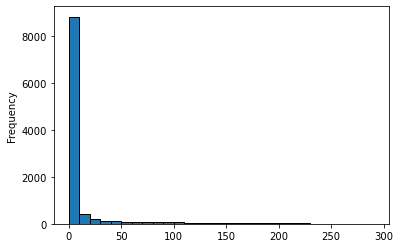

In [13]:
items_df['historical_sold'].plot.hist(bins=range(0, 300,10), edgecolor='black')

In [14]:
# Tính thử độ lệch của output
items_df['historical_sold'].skew()

22.392901815404624

Ta sẽ quay lại xử lý vấn đề này sau

### 2. Ý nghĩa của mỗi dòng
Quan sát sơ bộ dữ liệu và qua quá trình crawler data, ta thấy mỗi dòng chứa thông tin của một món hàng, và không có vấn đề các dòng có ý nghĩa khác nhau

### 3. Kiểm tra các giá trị trùng
Ta xem thử có bao nhiêu mẫu bị trùng giá trị

In [15]:
num_duplicated_rows = items_df.duplicated().sum()
num_duplicated_rows

102

Xóa các mẫu có giá trị trùng bằng phương thức drop_duplicates của pandas, mặc định giữ lại dòng có giá trị lặp đầu tiên

In [16]:
items_df = items_df.drop_duplicates(ignore_index = True)

### 4. Kiểm tra các giá trị không hợp lệ

In [17]:
items_df.describe()

,category_id,item_public_time,item_be_got_time,sell_time,options,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,images,video_info_list,historical_sold
count,10748.000000,1.074800e+04,1.074800e+04,1.074800e+04,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,0.0,0.0,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,1.074800e+04,0.0,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000
mean,7820.808895,1.615117e+09,1.610267e+09,-4.849890e+06,14.083923,1.512381,17.058523,1.077131,0.473111,0.156866,0.304243,NaN,NaN,2.490995e+10,1.942725e+10,2.564087e+10,1.988520e+10,2.491504e+10,1.949396e+10,NaN,377.439896,332.093599,19.031169,6.764421,0.082713,89.395702
std,4532.649995,1.639321e+08,3.366795e+05,1.638767e+08,13.191224,2.233879,174.807206,14.037485,7.121846,2.869150,6.136859,NaN,NaN,2.676040e+10,2.441459e+10,2.721072e+10,2.489001e+10,2.675672e+10,2.457162e+10,NaN,2223.495576,3215.224983,202.068231,2.586901,0.275461,835.687930
min,1899.000000,1.439048e+09,1.609910e+09,-1.567207e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.500000e+08,-2.000000e+00,2.730000e+08,-2.000000e+00,2.500000e+08,0.000000e+00,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2829.000000,1.582929e+09,1.609949e+09,2.874107e+06,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,9.900000e+09,-1.000000e+00,9.990000e+09,-1.000000e+00,9.900000e+09,0.000000e+00,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
50%,8947.000000,1.598349e+09,1.609994e+09,1.200848e+07,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.790000e+10,1.290000e+10,1.817000e+10,1.291000e+10,1.790000e+10,1.290000e+10,NaN,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,9572.000000,1.607335e+09,1.610629e+09,2.730005e+07,20.000000,4.714286,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.092000e+10,3.200000e+10,3.157750e+10,3.300000e+10,3.093250e+10,3.200000e+10,NaN,5.000000,28.000000,1.000000,9.000000,0.000000,4.000000
max,15139.000000,3.177817e+09,1.610639e+09,1.715907e+08,100.000000,5.996798,7869.000000,777.000000,427.000000,199.000000,462.000000,NaN,NaN,6.900000e+11,3.580000e+11,6.900000e+11,3.580000e+11,6.900000e+11,3.580000e+11,NaN,79919.000000,189252.000000,9737.000000,9.000000,1.000000,37079.000000


Nhìn vào bảng trên, ta thấy có một số bất thường. Thật ra giá trị của những mẫu này đều đang hoạt động bình thường trên giao diện shopee nên khả năng lỗi là rất thấp. Ta vẫn xem xét các trường hợp như sau:

1. Cột price_min_before_discount và cột price_max_before_discount có giá trị âm

2. Cột sell_time có giá trị âm
  
2. So sánh price_min > price_max, price_min_before_discount > price_max_before_discount

3. So sánh price < price_before_discount, price_min < price_min_before_discount, price_max < price_max_before_discount

In [18]:
# Xử lý trường hợp 1.

invalid_price_negative = (items_df.price_min_before_discount < 0) | (items_df.price_max_before_discount < 0)
invalid_price_negative_vals = invalid_price_negative.sum()
invalid_price_negative_vals/len(items_df)

0.39067733531819876

Ta thấy có đến xấp xỉ 39.07% các giá trị `price_min_before_discount` và `price_min_before_discount` bị âm.
Do shopee vẫn hiển thị bình thường nên ta dự đoán có lẽ do tại những mẫu có giá trị âm này thì `discount` bị thiếu. 

In [19]:
print((items_df.discount.isnull()).sum()/len(items_df))
print((items_df.discount.isnull()).sum()/len(items_df) == invalid_price_negative_vals/len(items_df))

0.39067733531819876
True


Kiểm tra thấy hai giá trị là hoàn toàn giống nhau chứng tỏ dự đoán là đúng.
Vậy code Shopee chịu lỗi này hoặc đây là quy ước data của shopee, khi lấy mẫu mới về từ Shopee trường hợp này vẫn sẽ là giá trị âm. Vậy nên những giá trị âm này ta xem như hợp lệ

In [20]:
# Xử lý trường hợp 2.
invalid_sell_time = (items_df['sell_time'] < 0)
invalid_sell_time.sum()

348

Có khá nhiều mẫu có thuộc tính sell_time âm, ta xóa những mẫu này

In [21]:
items_df = items_df[~invalid_sell_time]

In [22]:
# Xử lý trường hợp 3
invalid_price_min_max = (items_df.price_min_before_discount > items_df.price_max_before_discount) | (items_df.price_max < items_df.price_min)
invalid_price_min_max_vals = invalid_price_min_max.sum()
invalid_price_min_max_vals


1

Có 1 mẫu bất hợp lệ trong trường hợp này, ta xóa nốt

In [23]:
items_df = items_df[~invalid_price_min_max]

In [24]:
# Xử lý trường hợp 4
invalid_price_before_after = (items_df.price > items_df.price_before_discount) | (items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)
invalid_price_before_after_vals = invalid_price_before_after.sum()
invalid_price_before_after_vals / len(items_df)

0.3993653235888066

Ta thấy phần trăm các giá trị lỗi giống như ở trường hợp 1 nên kiểm tra riêng lại cho điều kiện (items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)

In [25]:
print('(items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount):\n->', ((items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)).sum()/len(items_df))
print('True if it equal to (items_df.discount == "None").sum()/len(items_df))\n->', ((items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)).sum()/len(items_df) == (items_df.discount == 'None').sum()/len(items_df))

(items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount):
-> 0.3993653235888066
True if it equal to (items_df.discount == "None").sum()/len(items_df))
-> False


Vậy tương tự như trường hợp 1, những giá trị này là hợp lệ

Kiểm tra lại số mẫu

In [26]:
items_df.shape

(10399, 34)

### 5. Xử lý dữ liệu bị lệch

Ta sẽ viết một hàm để giảm độ lệch của dữ liệu, ý tưởng là giảm số lượng giá trị xuất hiện nhiều nhất bằng với số lượng của giá trị xuất hiện nhiều thứ 2 cho đến khi độ lệch đạt một mức nào đó, ta sẽ điều chỉnh tham số s là độ lệch của cột đó sau khi biến đổi bằng hàm logarithm tự nhiên với độ dời là 1 (hàm log(x + 1)) do dữ liệu có giá trị 0

In [27]:
def reduce_skew(df, column, s=0.6):
    k = df.copy()
    while (np.log(k[column] + 1).skew() > s):
        vc = k[column].value_counts()
        mf = vc.index[0]
        if len(vc[vc < vc[0]]):
            sf_n = vc[vc < vc[0]].iloc[0]
        else:
            break
        mf_sample = k[k[column] == mf]
        not_mf_sample = k[k[column] != mf]
        undersampled = resample(mf_sample, replace = False,
                                    n_samples = sf_n, random_state = 0)
        k = pd.concat([undersampled, not_mf_sample])
    return k

Gọi hàm reduce_skew với mỗi s tùy chọn, lưu ý rằng khi độ lệch càng nhỏ tức là phải bỏ đi nhiều mẫu, ta sẽ cố gắng cân bằng sao cho độ lệch và số mẫu ở mức chấp nhận được. Dữ liệu có độ lệch < 1 thì có thể coi là không lệch quá nhiều, vậy ta sẽ chọn s = 0.9

In [28]:
x = reduce_skew(items_df, 'historical_sold', 0.9)
x.shape

(3967, 34)

Số mẫu còn lại là 3900 từ hơn 10000 mẫu. 

Tiếp theo ta sẽ so sánh độ lệch của dữ liệu trước và sau khi giảm lệch

In [29]:
print('Độ lệch trước:', items_df['historical_sold'].skew())
print('Độ lệch sau:', x['historical_sold'].skew())

Độ lệch trước: 22.84609010299126
Độ lệch sau: 14.191024989235334


<AxesSubplot:ylabel='Frequency'>

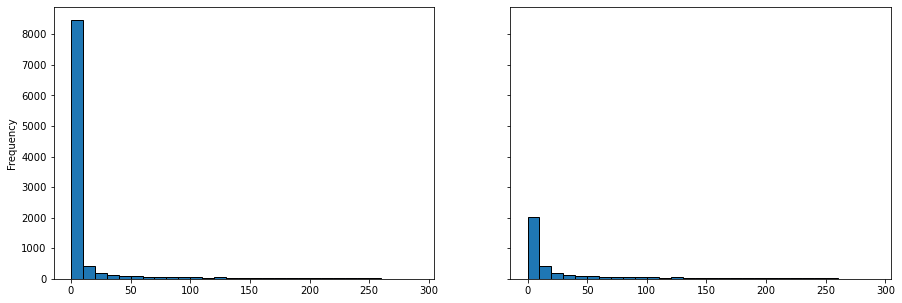

In [30]:
# Vẽ biểu đồ phân phối giữa dữ liệu trước và sau khi giảm lệch
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
items_df['historical_sold'].plot.hist(bins=range(0, 300, 10), edgecolor='black',ax=ax)
x['historical_sold'].plot.hist(bins=range(0, 300, 10), edgecolor='black', ax=ax2)

Có thể thấy độ lệch được giảm đáng kể, ta hãy tiếp tục so sánh độ lệch của dữ liệu sau khi biến đổi

In [31]:
transformed_before = np.log(items_df['historical_sold'] + 1)
transformed_after = np.log(x['historical_sold'] + 1)
print('Độ lệch trước:', transformed_before.skew())
print('Độ lệch sau:', transformed_after.skew())

Độ lệch trước: 1.9205475195292694
Độ lệch sau: 0.7989797963253716


<AxesSubplot:ylabel='Frequency'>

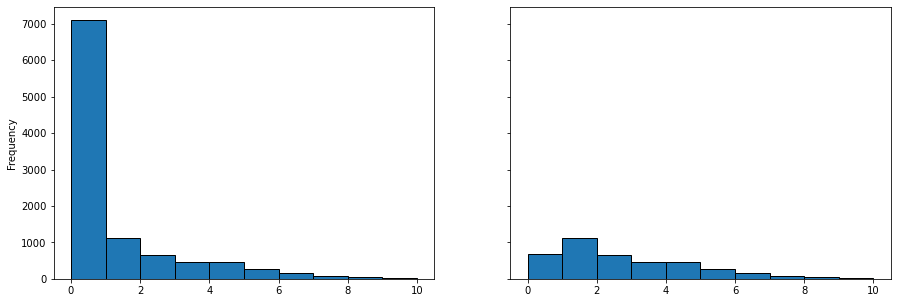

In [32]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
transformed_before.plot.hist(bins=range(0, 11, 1), edgecolor='black', ax=ax)
transformed_after.plot.hist(bins=range(0, 11, 1), edgecolor='black', ax=ax2)

Ta thấy khi s = 0.9 thì phân phối có vẻ tốt, vậy ta quyết định biến đổi output bằng hàm log nói trên để dữ liệu phân bố đều hơn

In [33]:
items_df = x
items_df['historical_sold'] = transformed_after
items_df['historical_sold'].describe()

count    3967.000000
mean        2.745083
std         2.055163
min         0.000000
25%         1.098612
50%         2.302585
75%         4.158883
max        10.520833
Name: historical_sold, dtype: float64

### 6. Tách các tập
Vậy là dữ liệu đã sẵn sàng để tách và khám phá

In [34]:
# Tách X và y
y_sr = items_df["historical_sold"]
X_df = items_df.drop("historical_sold", axis=1)

In [35]:
# Tách train và test
rest_X_df, test_X_df, rest_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.2, random_state=0)

In [36]:
# Tách train và validation
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(rest_X_df, rest_y_sr, test_size=0.2, random_state=0)

In [37]:
train_X_df.shape

(2538, 33)

In [38]:
train_y_sr.shape

(2538,)

In [39]:
val_X_df.shape

(635, 33)

In [40]:
val_y_sr.shape

(635,)

In [41]:
test_X_df.shape

(794, 33)

In [42]:
test_y_sr.shape

(794,)

## IV. Khám phá dữ liệu (tập huấn luyện)

Quá trình làm việc của nhóm trong branch [Preprocessing](https://github.com/cstotodile/ds_final/tree/Preprocessing)


### 1. Kiểm tra kiểu dữ liệu của input có phù hợp

In [43]:
train_X_df.dtypes

category_id                            int64
name                                  object
shop_location                         object
item_public_time                     float64
item_be_got_time                     float64
sell_time                            float64
shopee_verified                       object
discount                              object
is_adult                              object
options                              float64
show_official_shop_label_in_title     object
rating_star                          float64
five_star                            float64
four_star                            float64
three_star                           float64
two_star                             float64
one_star                             float64
flash_sale                           float64
upcoming_flash_sale                  float64
price_min                            float64
price_min_before_discount            float64
price_max                            float64
price_max_

Ta nhận thấy thuộc tính `discount` có kiểu dữ liệu không phù hợp, đáng lẽ phải ở dạng số. Ta hãy kiểm tra xem `discount` giữ những giá trị gì?

In [44]:
train_X_df['discount'].unique()

array(['48%', '46%', nan, '47%', '36%', '30%', '34%', '13%', '19%', '56%',
       '43%', '41%', '40%', '35%', '25%', '50%', '42%', '33%', '45%',
       '38%', '7%', '37%', '31%', '29%', '18%', '15%', '39%', '49%',
       '20%', '44%', '26%', '5%', '24%', '32%', '21%', '23%', '27%',
       '28%', '10%', '22%', '4%', '53%', '1%', '17%', '12%', '51%', '11%',
       '14%', '6%', '16%', '9%', '3%', '8%', '61%', '2%', '60%', '52%'],
      dtype=object)

Nhận xét: `discount` gồm con số và theo sau là kí tự %, `discount` có giá trị nan

### 2. Phân bố giá trị của cột có kiểu dữ liệu dạng số

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Kết quả được lưu vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `train_X_df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" 

In [45]:
num_cols = ['item_public_time','item_be_got_time', 'sell_time', 'discount', 
            'options', 'rating_star' ,'five_star', 'four_star', 'three_star', 
            'two_star' ,'one_star' ,'price_min_before_discount', 'price_max', 'price_min', 
            'price_max_before_discount', 'price', 'price_before_discount', 
            'liked_count', 'view_count', 'cmt_count','images', 'video_info_list']
cat_cols = list(set(train_X_df.columns) - set(num_cols))

In [46]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)
df = train_X_df[num_cols]
num_col_info_df = df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
num_col_info_df

,item_public_time,item_be_got_time,sell_time,discount,options,rating_star,five_star,four_star,three_star,two_star,one_star,price_min_before_discount,price_max,price_min,price_max_before_discount,price,price_before_discount,liked_count,view_count,cmt_count,images,video_info_list
missing_ratio,0.000000e+00,0.000000e+00,0.0,29.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
min,1.439048e+09,1.609910e+09,70041.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000e+00,2.730000e+08,2.665000e+08,-1.000000e+00,2.665000e+08,0.000000e+00,0.0,0.0,0.0,1.0,0.0
lower_quartile,1.559014e+09,1.609949e+09,12112114.8,NaN,4.0,4.0,1.0,0.0,0.0,0.0,0.0,-1.000000e+00,7.500000e+09,6.900000e+09,-1.000000e+00,6.900000e+09,0.000000e+00,1.0,4.0,1.0,5.0,0.0
median,1.583827e+09,1.609994e+09,26419699.5,NaN,9.0,4.9,3.0,0.0,0.0,0.0,0.0,1.250000e+10,1.152140e+10,1.098500e+10,1.290000e+10,1.098500e+10,1.250000e+10,8.0,42.0,3.0,8.0,0.0
upper_quartile,1.598262e+09,1.610629e+09,51440169.5,NaN,18.0,5.0,14.0,1.0,0.0,0.0,0.0,2.100000e+10,1.890000e+10,1.850000e+10,2.150000e+10,1.850000e+10,2.100000e+10,185.0,204.0,15.0,9.0,0.0
max,1.610296e+09,1.610639e+09,171590688.0,NaN,80.0,5.0,7869.0,777.0,427.0,199.0,462.0,1.750000e+11,6.900000e+11,6.900000e+11,1.750000e+11,6.900000e+11,1.750000e+11,70382.0,189252.0,9737.0,9.0,1.0


Nhận xét: Tuy một số thuộc tính có phân bố bị lệch nhưng điều này không ảnh hưởng đến việc mô hình hóa, nhìn chung thì không có gì bất thường cả

### 3. Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 

- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu)

- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

Kết quả được lưu vào DataFrame `cat_col_info_df`, trong đó: 

- Tên của các cột là tên của các cột không phải số trong `train_X_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

Trước hết kiểm tra có bao nhiêu giá trị `name`

In [47]:
len(train_X_df['name'].unique())

2213

Do giá trị `name` rất nhiều ta sẽ không xét nó nữa và sẽ xóa trong phần tiền xử lý

In [48]:
cat_cols = list(set(cat_cols) - set(['name']))

In [49]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df = train_X_df[cat_cols]
cat_col_info_df = df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,is_preferred_plus_seller,is_adult,flash_sale,upcoming_flash_sale,show_official_shop_label_in_title,coin_earn_label,category_id,shop_location,shopee_verified,show_free_shipping
missing_ratio,0,0,100,100,0.9,100,0,0.7,0,0
num_values,2,2,0,0,2,0,9,36,2,2
value_ratios,"{False: 93.1, True: 6.9}","{'False': 100.0, 'True': 0.0}",{},{},"{'False': 95.6, 'True': 4.4}",{},"{15139: 24.3, 8947: 14.1, 8948: 13.5, 2429: 13.1, 1899: 11.7, 2831: 8.0, 9572: 7.4, 2829: 4.8, 8945: 3.1}","{'Hà Nội': 40.1, 'Nước ngoài': 27.0, 'TP. Hồ Chí Minh': 26.8, 'Bình Định': 0.8, 'Bình Dương': 0.7, 'Quảng Ninh': 0.6, 'Hà Nam': 0.5, 'Phú Thọ': 0.5, 'Đồng Nai': 0.5, 'Hưng Yên': 0.2, 'Bắc Ninh': 0.2, 'Lào Cai': 0.2, 'Hải Dương': 0.2, 'An Giang': 0.2, 'Hải Phòng': 0.2, 'Đắk Nông': 0.2, 'Đắk Lắk': 0.2, 'Nghệ An': 0.1, 'Cần Thơ': 0.1, 'Ninh Bình': 0.1, 'Kon Tum': 0.1, 'Thừa Thiên Huế': 0.1, 'Thái Nguyên': 0.1, 'Đà Nẵng': 0.1, 'Nam Định': 0.1, 'Bà Rịa - Vũng Tàu': 0.1, 'Bình Thuận': 0.0, 'Thanh Hóa': 0.0, 'TP. Hồ Chí': 0.0, 'Thái Bình': 0.0, 'Vĩnh Phúc': 0.0, 'Bắc Kạn': 0.0, 'Bắc Giang': 0.0, 'Cà Mau': 0.0, 'Tiền Giang': 0.0, 'Lâm Đồng': 0.0}","{False: 57.1, True: 42.9}","{False: 56.7, True: 43.3}"


Nhận xét: 
- Thuộc tính `coin_earn_label`, `flash_sale` và `upcoming_flash_sale` thiếu 100% giá trị, ta sẽ xóa  ba thuộc tính này bằng câu lệnh sau:
```python
Pandas.DataFrame.dropna(axis = 1, how = 'all')
```
- Thuộc tính `is_adult` có 100% giá trị False, ta xóa thuộc tính này
- Thuộc tính `show_official_shop_label_in_title` thiếu 0.6%, có giá trị True False nhưng ở dạng chuỗi
- Thuộc tính `shop_location` có 3 giá trị chiếm phần lớn mẫu là 'Hà Nội', 'TP. Hồ Chí Minh', 'Nước ngoài' với tỉ lệ chiếm là hơn 90%

- Thuộc tính `shop_location` _thiếu_ 0.5%

  - Ta có thể xóa các mẫu bị thiếu dữ liệu do thiếu ít, hoặc điền giá trị thiếu nhờ hỗ trợ của thư viện SciKit Learn nhưng ta sẽ thử xử lý ở thuộc tính này thay vì xóa hẳn.

  - Lưu ý rằng các dữ liệu này vẫn hoạt động tốt trên shopee nên ta dùng lệnh sau để xem những mẫu nào bị _thiếu_ và đối chiếu với trên shopee.
```python
items_df.loc[items_df['shop_location'].isnull()]
```

Sau khi đối chiếu ta được kết quả sau: 

Mẫu không thiếu:

![shop_location_not_missing_value](images/shop_location_not_missing_value.jpg)

Mẫu thiếu:

![shop_location_missing_value](images/shop_location_missing_value.jpg)

Tức là những mẫu có thuộc tính shop_location thiếu sẽ không hiển thị vị trí shop ở góc dưới.

Vậy ta sẽ xử lý bằng cách thay các giá trị thiếu này thành chuỗi "None".


In [50]:
items_df.loc[items_df['shop_location'].isnull()]

,category_id,name,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list,historical_sold
4126,2831,Nón Kết Đen ❤FREESHIP❤ Mũ lưỡi trai nam nữ thời trang Hàn Quốc hàng chất lượng tốt loại 1,NaN,1.599018e+09,1.609910e+09,10892814.0,False,10%,False,1.0,NaN,5.000000,1.0,0.0,0.0,0.0,0.0,NaN,NaN,9.900000e+09,1.100000e+10,9.900000e+09,1.100000e+10,9.900000e+09,1.100000e+10,NaN,6.0,116.0,1.0,False,False,5.0,0.0,0.693147
2381,9572,[Nhung123] Túi đeo chéo 🎒 Free Ship 🎒 Túi đeo vai thời trang nam,NaN,1.607187e+09,1.609994e+09,2807274.0,False,NaN,False,5.0,False,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.694000e+10,-1.000000e+00,1.694000e+10,-1.000000e+00,1.694000e+10,0.000000e+00,NaN,0.0,0.0,0.0,False,False,9.0,0.0,0.000000
5107,1899,"[ DEAL KHỦNG ] Quần short jeans nam thiết kế thời trang cao cấp nam , quần sọt jean thời trang nam C12 - TCBOUTIQUE",NaN,1.608439e+09,1.609992e+09,1552897.0,False,NaN,False,6.0,False,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.853330e+10,-1.000000e+00,1.853330e+10,-1.000000e+00,1.853330e+10,0.000000e+00,NaN,0.0,3.0,0.0,False,False,5.0,0.0,0.000000
2386,9572,[Nhung123] Túi đeo chéo 🎒 Free Ship 🎒 Túi đeo vai thời trang nam,NaN,1.607187e+09,1.609994e+09,2807280.0,False,NaN,False,5.0,False,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.694000e+10,-1.000000e+00,1.694000e+10,-1.000000e+00,1.694000e+10,0.000000e+00,NaN,0.0,0.0,0.0,False,False,9.0,0.0,0.000000
3850,2831,Khăn quàng cổ nam ấp đẹp thời trang,NaN,1.590046e+09,1.609910e+09,19864572.0,False,NaN,False,3.0,NaN,4.947368,54.0,3.0,0.0,0.0,0.0,NaN,NaN,2.090000e+10,-1.000000e+00,2.090000e+10,-1.000000e+00,2.090000e+10,0.000000e+00,NaN,55.0,644.0,57.0,False,False,8.0,0.0,4.454347
3857,2831,"Nón kết, Mũ lưỡi trai thể thao lưới 2 lớp cao cấp thấm hút mồ hôi thời trang nam",NaN,1.591948e+09,1.609910e+09,17962064.0,False,25%,False,3.0,NaN,4.888889,8.0,1.0,0.0,0.0,0.0,NaN,NaN,4.900000e+09,6.500000e+09,4.900000e+09,6.500000e+09,4.900000e+09,6.500000e+09,NaN,3.0,114.0,9.0,False,False,5.0,1.0,2.995732
3859,2831,Mũ nón lưỡi trai nam Ediko thời trang nam,NaN,1.607101e+09,1.609910e+09,2809294.0,False,NaN,False,1.0,NaN,5.000000,3.0,0.0,0.0,0.0,0.0,NaN,NaN,2.500000e+10,-1.000000e+00,2.500000e+10,-1.000000e+00,2.500000e+10,0.000000e+00,NaN,0.0,23.0,3.0,False,False,4.0,0.0,3.663562
3867,2831,Vớ thời trang nam,NaN,1.544847e+09,1.609910e+09,65063516.0,False,NaN,False,4.0,NaN,5.000000,28.0,0.0,0.0,0.0,0.0,NaN,NaN,1.500000e+10,-1.000000e+00,2.500000e+10,-1.000000e+00,1.500000e+10,0.000000e+00,NaN,3.0,1.0,28.0,False,True,1.0,0.0,4.290459
3887,2831,"Nón lưỡi trai Kaki nam nữ MrCAPs freesize, full hộp, Nón Kết thêu Logo, Trắng, Đen",NaN,1.603450e+09,1.609910e+09,6460881.0,False,7%,False,20.0,NaN,4.764706,13.0,4.0,0.0,0.0,0.0,NaN,NaN,1.390000e+10,1.500000e+10,1.390000e+10,1.500000e+10,1.390000e+10,1.500000e+10,NaN,28.0,696.0,17.0,False,False,6.0,0.0,4.025352
3888,2831,Mũ Nón Kết - Mũ Lưỡi Trai Kaki Rách Thời Trang Cao Cấp cực chất dành cho cả nam và nữ.,NaN,1.587717e+09,1.609910e+09,22193418.0,False,40%,False,3.0,NaN,4.802326,74.0,7.0,5.0,0.0,0.0,NaN,NaN,1.500000e+10,2.500000e+10,1.500000e+10,2.500000e+10,1.500000e+10,2.500000e+10,NaN,142.0,1237.0,86.0,False,True,9.0,0.0,5.411646


## V. Tiền xử lý (tập huấn luyện)

### 1. Bỏ cột

Ta sẽ tiến hành bỏ những cột sau:
- `name`: do quá nhiều giá trị, nếu mã hóa bằng OneHot hoặc sử dụng kỹ thuật Bag of Word thì số cột tăng lên rất nhiều
- `flash_sale`, `upcoming_flash_sale`, `coin_earn_label`: 3 thuộc tính đều bị thiếu toàn bộ dữ liệu nên vô nghĩa
- `is_adult`: chỉ có giá trị False nên cũng vô nghĩa

### 2. Sửa cột
Ta tiến hành sửa những cột sau: 
1. `shop_location`: Ta thấy có khá nhiều giá trị khác nhau trong tập huấn luyện, trong đó có các giá trị chỉ xuất hiện một hoặc một ít lần; nếu ta để nguyên thì khi chuyển sang dạng số bằng phương pháp one-hot sẽ có nhiều cột → dễ bị overfit. Ta sẽ xử lý vấn đề này như sau: chỉ lấy num_top_locations (ví dụ, 4) giá trị xuất hiện nhiều nhất, các giá trị còn lại sẽ được thay thế bằng giá trị "Others". Lúc sau, ta sẽ thí nghiệm để chọn ra giá trị num_top_locations

2. `discount`: có thêm kí tự % đằng sau nên có kiểu chuỗi, vậy ta sẽ tách số ra đó và chuyển thành số. Ngoài ra, ta còn thấy `discount` có giá trị thiếu. Kiểm tra đối chiếu với các item trên Shopee, ta thấy thực tế những mẫu bị _thiếu_ dữ liệu ở thuộc tính `discount` là do không có giảm giá (`discount` = 0). Ta tiến hành sửa bằng cách thay giá trị nan tại cột này thành 0

3. `shopee_verified`, `show_official_shop_label_in_title`, `is_preferred_plus_seller`, `show_free_shipping`: những cột kiểu bool như này thì ta chuyển hết về 0 và 1


Class ColAdderDropper sẽ thực hiện các bước trên.

In [51]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_locations=3):
        self.num_top_locations = num_top_locations
    def fit(self, X_df, y=None):
        location_col = X_df['shop_location'].copy()
#         location_col = location_col.replace('None', np.nan)
        location_col = location_col.replace(np.nan, 'None')
        self.location_counts_ = location_col.value_counts()
        locations = list(self.location_counts_.index)
        self.top_locations_ = locations[:max(1, min(self.num_top_locations, len(locations)))]
        return self
    def transform(self, X_df, y=None):
        tf_df = X_df.copy()
        
        # Bước 1
        tf_df = tf_df.dropna(axis = 0, thresh = 15)
        tf_df = tf_df.dropna(axis = 1, how = 'all')
        tf_df = tf_df.drop(['name', 'is_adult'], axis=1)
        
        # Bước 2.1 Sửa cột location
        tf_df['shop_location'] = tf_df['shop_location'].replace(np.nan, 'None')
        locations = list(tf_df['shop_location'].value_counts().index)
        other_locations = list(set(locations) - set(self.top_locations_))
        tf_df['shop_location'] = tf_df['shop_location'].replace(other_locations, 'Others')
        
        # Bước 2.2 Sửa cột discount
        tf_df['discount'] = tf_df['discount'].replace(np.nan, 0)
        
        def apply_discount(discount):
            if type(discount) == int:
                return discount
            else:
                result = re.findall(r'\d+',discount)
                return result[0]
            pass

        tf_df['discount'] = tf_df.apply(lambda row: apply_discount(row['discount']), axis=1)
        
        def convert_col_dtype(col):
            if col.name in ['discount']:
                return pd.to_numeric(col, errors='coerce')
            return col

        tf_df = tf_df.apply(convert_col_dtype)
        
        # Bước 3.3 Sửa các cột boolean
        def apply_bool(FalseOrTrue):
            if FalseOrTrue == 'False' or FalseOrTrue == False:
                return 0
            if FalseOrTrue == 'True' or FalseOrTrue == True:
                return 1
            else:
                return FalseOrTrue
            pass

        tf_df['show_official_shop_label_in_title'] = tf_df.apply(lambda row: apply_bool(row['show_official_shop_label_in_title']), axis=1)
        tf_df['is_preferred_plus_seller'] = tf_df.apply(lambda row: apply_bool(row['is_preferred_plus_seller']), axis=1)
        tf_df['shopee_verified'] = tf_df.apply(lambda row: apply_bool(row['shopee_verified']), axis=1)
        tf_df['show_free_shipping'] = tf_df.apply(lambda row: apply_bool(row['show_free_shipping']), axis=1)
        return tf_df
        #raise NotImplementedError()

In [52]:
# Test
col_adderdropper = ColAdderDropper(num_top_locations=4)
fewer_cols_train_X_df = col_adderdropper.fit_transform(train_X_df)
fewer_cols_train_X_df.head()

,category_id,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list
9009,15139,TP. Hồ Chí Minh,1.590657e+09,1.610639e+09,19981277.0,1,48,8.0,0.0,5.000000,7.0,0.0,0.0,0.0,0.0,9.900000e+09,1.890000e+10,1.090000e+10,1.890000e+10,9.900000e+09,1.890000e+10,4.0,104.0,7.0,0,0,8.0,1.0
3872,2831,Hà Nội,1.602761e+09,1.609910e+09,7149688.0,0,46,1.0,0.0,4.666667,5.0,0.0,1.0,0.0,0.0,8.900000e+09,1.660000e+10,8.900000e+09,1.660000e+10,8.900000e+09,1.660000e+10,8.0,493.0,6.0,0,0,5.0,0.0
10475,15139,TP. Hồ Chí Minh,1.508202e+09,1.610639e+09,102436797.0,0,0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,4.800000e+09,-1.000000e+00,4.800000e+09,-1.000000e+00,4.800000e+09,0.000000e+00,1.0,3.0,0.0,0,1,5.0,0.0
4806,1899,Hà Nội,1.586276e+09,1.609992e+09,23715556.0,1,47,20.0,0.0,4.927273,208.0,9.0,2.0,1.0,0.0,6.900000e+09,1.290000e+10,6.900000e+09,1.290000e+10,6.900000e+09,1.290000e+10,63.0,110.0,220.0,0,1,9.0,0.0
6168,2829,Nước ngoài,1.609852e+09,1.610610e+09,757726.0,1,36,42.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.785530e+10,2.785530e+10,1.785530e+10,2.785530e+10,1.785530e+10,2.785530e+10,0.0,0.0,0.0,0,0,7.0,0.0


In [53]:
# Kiểm tra các giá trị không phải số đã được xử lý đúng chưa
cat_cols = list(set(fewer_cols_train_X_df.columns) - set(num_cols))
df = fewer_cols_train_X_df[cat_cols]
cat_col_info_df = df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,is_preferred_plus_seller,show_official_shop_label_in_title,category_id,shop_location,shopee_verified,show_free_shipping
missing_ratio,0,0.9,0,0,0,0
num_values,2,2,9,5,2,2
value_ratios,"{0: 93.1, 1: 6.9}","{0.0: 95.6, 1.0: 4.4}","{15139: 24.3, 8947: 14.1, 8948: 13.5, 2429: 13.1, 1899: 11.7, 2831: 8.0, 9572: 7.4, 2829: 4.8, 8945: 3.1}","{'Hà Nội': 39.8, 'Nước ngoài': 26.8, 'TP. Hồ Chí Minh': 26.6, 'Others': 6.1, 'Bình Định': 0.7}","{0: 57.1, 1: 42.9}","{0: 56.7, 1: 43.3}"


### 3. Xử lý giá trị thiếu
- Với các thuộc tính bị thiếu toàn bộ dữ liệu, các mẫu bị thiếu từ 15 thuộc tính ta đã xử lý ở class ColAdderDropper phía trên bằng 2 dòng lệnh sau:
```python
tf_df = tf_df.dropna(axis = 0, thresh = 15)
tf_df = tf_df.dropna(axis = 1, how = 'all')
```
- Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột dạng số trong tập huấn luyện, ta đều cần tính mean, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới. 
- Với các cột không phải dạng số và không có thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột không có dạng số và không có thứ tự, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot <font color=gray>(gợi ý: dùng `OneHotEncoder` trong Sklearn, để ý tham số `handle_unknown` vì khi dự đoán với các véc-tơ input mới ...)</font>.
- Với cột không phải dạng số và có thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột.
    - Các giá trị của cột này đều là kiểu boolean và ta đã chuyển sang dạng 0, 1 trước đó nên không cần phải mã hóa nữa

In [54]:
nume_cols = ['item_public_time','item_be_got_time', 'sell_time', 'discount', 
            'options', 'rating_star' ,'five_star', 'four_star', 'three_star', 
            'two_star' ,'one_star' ,'price_min_before_discount', 'price_max', 'price_min', 
            'price_max_before_discount', 'price', 'price_before_discount', 
            'liked_count', 'view_count', 'cmt_count','images', 'video_info_list']
unorder_cate_cols = ['category_id', 'shop_location']
order_cate_cols = ['is_preferred_plus_seller', 'shopee_verified', 'show_free_shipping', 'show_official_shop_label_in_title']

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
enc = OneHotEncoder(handle_unknown='ignore')
unorder_cate_pipeline = make_pipeline(imp_mode, enc)
column_transformer = ColumnTransformer(transformers = [('numerical', imp_mean, nume_cols),
                                                      ('unorder_categorical', unorder_cate_pipeline, unorder_cate_cols),
                                                      ('order_categorical', imp_mode, order_cate_cols)], remainder='passthrough')

### 4. Chuẩn hóa
Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa bằng cách trừ đi mean và chia cho độ lệch chuẩn của cột để giúp cho các thuật toán cực tiểu hóa như Gradient Descent, LBFGS,... hội tụ nhanh hơn 

### 5. Tạo pipeline

Khi đã có những bước tiền xử lý cụ thể, ta sẽ tạo pipeline chứa chúng để cho quá trình tiền xử lý và mô hình hóa được dễ dàng hơn

In [55]:
preprocess_pipeline = make_pipeline(ColAdderDropper(), column_transformer,  StandardScaler())

In [56]:
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

In [57]:
preprocessed_train_X.shape

(2538, 39)

In [58]:
preprocessed_val_X.shape

(635, 39)

### 6. Xem covariance matrix

In [64]:
train_y_sr

9009     2.995732
3872     2.890372
10475    1.386294
4806     6.018593
6168     0.000000
           ...   
9939     4.787492
8198     4.997212
9605     1.098612
9963     1.098612
5901     4.290459
Name: historical_sold, Length: 2538, dtype: float64

In [67]:
x_for_cov_df = train_X_df.copy()
x_for_cov_df['historical sold'] = train_y_sr.copy()

In [68]:
x_for_cov = preprocess_pipeline.fit_transform(x_for_cov_df)
x_for_cov

array([[ 0.53971133,  1.10932512, -0.52553703, ..., -0.87461496,
        -0.21284919,  0.10053046],
       [ 0.9955722 , -1.03504947, -1.0088401 , ..., -0.87461496,
        -0.21284919,  0.04996182],
       [-2.56589565,  1.10932512,  2.58015829, ...,  1.14336028,
        -0.21284919, -0.67193245],
       ...,
       [ 0.39562115,  1.10932512, -0.38144275, ..., -0.87461496,
        -0.21284919, -0.81000782],
       [ 0.60721016,  1.10932512, -0.59303778, ..., -0.87461496,
        -0.21284919, -0.81000782],
       [-1.40904689,  1.02515377,  1.42219996, ...,  1.14336028,
        -0.21284919,  0.72194537]])

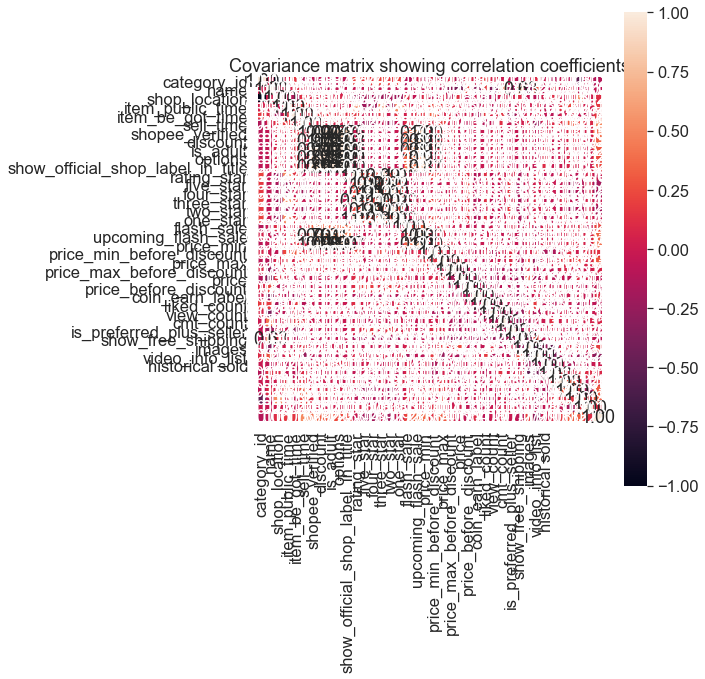

In [71]:
cov_mat =np.cov(x_for_cov.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 yticklabels=x_for_cov_df.columns,
                 xticklabels=x_for_cov_df.columns)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

## VI. Mô hình hóa dữ liệu

### 1. Tìm mô hình tốt nhất

Do output là kiểu số thực liên tục nên ta sẽ sử dụng mô hình hồi quy để dự đoán các input mới, ta sẽ sử dụng các model đã được học sau:

- Hồi quy tuyến tính
- Mạng neural nhân tạo


Đầu tiên, đối với các mô hình hồi quy này thì ta sử dụng độ đo $R^2$ để đánh giá độ lỗi vì độ đo MSE không cho ta biết được cụ thể chất lượng của mô hình 

$R^2$ cho biết độ phù hợp của mô hình, người ta nghiên cứu được rằng, với $R^2$ > 0.5 thì một mô hình được đánh giá là phù hợp

#### Huấn luyện mô hình hồi quy tuyến tính 

In [ ]:
linear_full_pipeline = make_pipeline(ColAdderDropper(), column_transformer, StandardScaler(), LinearRegression())
linear_full_pipeline.fit(train_X_df, train_y_sr);

In [ ]:
# R^2 tập validation
linear_full_pipeline.score(val_X_df, val_y_sr)

Score < 0.5, **không** thỏa tiêu chí đặt ra

#### Thử nghiệm, class đánh giá các model (nếu có nhiều thời gian hơn em sẽ cải thiện class này)

Mục đích của class này: Giúp đánh giá các model tốt hơn, dễ dàng xem xét hơn

**Hàm khởi tạo**
```python
reviewModel = ReviewModel(val_y_sr, linear_pred,baseline_preds = baseline_preds, DistanceType = 'r2') 
```
- Tham số 1: `val_y_sr` target chính xác để so sánh
- Tham số 2: `linear_pred` mảng ba chiều có cấu trúc như sau:
  - Ngoài cùng là các model thử nghiệm khác nhau [model1,model2,...,modeln]
  - Trong mỗi model là kết quả trả về từ `predict` với các siêu tham số khác nhau: [predict1, predict2,..., predictn]
  - Trong mỗi kết quả trả về từ `predict`chính là các output được dự đoán từ chương trình.
- Tham số 3: baseline_preds, chỉ số baseline_preds cần truyền khi dùng mô hình $R^2$
- Tham số 4: `DistanceType`, độ đo sử dụng, **hiện tại hỗ trợ các độ đo** Hausdoff, MSE và $R^2$: `Hausdoff`, `mse`, `r2`

**Hàm tính toán:**
```python
reviewModel.calculate()
```
In ra màn hình kết quả bảng axb 
- với a: số cột: số siêu tham số thử cho model
- b: số hàng - số model chạy thử

Mỗi một ô thể hiện độ đo giữa tập val_y_sr và tập predict của một model nhất định tại một siêu tham số nhất định

Ta có thể xem lại kết quả này bằng cách gọi: `reviewModel.distance`

Kết quả trả về `binaryArray`,`bestIndexModel`
- `binaryArray`: Mảng 2 chiều, lưu siêu tham số tốt nhất của mỗi model dưới dạng nhị phân, 1 = tốt nhất, còn lại = 0. (Mỗi model là một hàng)
- `bestIndexModel`: Chỉ số của model tốt nhất trong các model, chỉ số ở đây là chỉ số đầu tiên trong `y_pred` cũng như `binaryArray`

Ví dụ `bestIndexModel` = 0 thì: 
- model lưu tại `binaryArray[0]` là tốt nhất 
- với độ lỗi tốt nhất là `reviewModel.distance[bestIndexModel][binaryArray[bestIndexModel].index(max(binaryArray[bestIndexModel]))]`
- alpha tốt nhất cho model tốt nhất: `alphas[binaryArray[bestIndexModel].index(max(binaryArray[bestIndexModel]))]`
- alpha tốt nhất cho model thứ i: `alphas[binaryArray[i].index(max(binaryArray[i]))]`

In [ ]:
y_pred = linear_full_pipeline.predict(val_X_df)

y_pred = y_pred[np.newaxis,:]
y_pred = y_pred[np.newaxis,:]
y_pred.shape

In [ ]:
baseline_preds = train_y_sr.mean()
reviewModel = ReviewModel(val_y_sr, y_pred,baseline_preds = baseline_preds, DistanceType = 'r2') 

In [ ]:
binaryArray,bestIndexModel = reviewModel.calculate()
reviewModel.distance

In [ ]:
binaryArray

In [ ]:
bestIndexModel

In [ ]:
reviewModel.distance[bestIndexModel][binaryArray[bestIndexModel].index(max(binaryArray[bestIndexModel]))]

In [ ]:
#best alpha for best model:
# print(alphas[binaryArray[bestIndexModel].index(max(binaryArray[bestIndexModel]))])

# print('best alpha for model 1', alphas[binaryArray[0].index(max(binaryArray[0]))])
# print('best alpha for model 2', alphas[binaryArray[1].index(max(binaryArray[1]))])

#### Huấn luyện mô hình mạng neural nhân tạo

Ta sẽ thử các siêu tham số khác nhau để tìm ra mô hình tốt nhất 

Nếu ta thử nhiều siêu tham số để tính độ lỗi trên **một** tập validation thì sẽ dẫn tới overfit và kết quả sẽ không khách quan

Vì thế ta sẽ dùng GridSearchCV để thử tham số và cross-validate các mô hình cụ thể, do tự động cross-validate nên ta sẽ fit trên toàn bộ tập train + validation, sau đó tìm ra siêu tham số tốt nhất

Các tham số thay đổi:
- `alpha`: 0.001, 0.1, 1
- `num_top_locations`: 1, 3, 5

Chạy GridSearchCV với tham số cv=3, nghĩa là sẽ thử 3 x 3 x 3 = 27 lần 

Các tham số được cố định:
- `hidden_layer_sizes`: 70
- `activation`: `relu`
- `solver`: Do dữ liệu rất nhiều nên sử dụng thuật toán `adam` sẽ hiệu quả hơn so với lbfgs (theo scikit-learn), tuy nhiên nhược điểm là train khá lâu
- `max_iter`: 10000 để cho thuật toán có thể đạt được hội tụ, nếu set quá thấp sẽ không đủ lần lặp để hội tụ

##### Suy nghĩ về vấn đề giảm chi phí thời gian

Ta thấy khi train nếu chỉ dùng mô hình fit cho tập đã được tiền xử lý sẽ nhanh hơn là dùng _full pipeline_ để vừa tiền xử lý vừa fit

- Với trường hợp chỉ thay đổi các tham số của mô hình ta có thể dùng phương án trên để giảm chi phí thời gian

Tuy nhiên do trong các tham số thay đổi có `num_top_locations` nên ta phải dùng đến `full_pipeline`, muốn giảm chi phí thời gian ta sẽ dùng vòng lặp `for` để chỉ tiền xử lý với mỗi giá trị của `num_top_locations` là 3 lần, thay vì tiền xử lý với số lần là 3 x 3 x 3 = 27 lần

Ta thử đo thời gian mỗi lần tiền xử lý tập _rest_X_df_ (vì khi fit ta sử dụng tập *rest_X_df*) như ở dưới thì thấy kết quả nằm giữa 0 và 0.5: __Mean: 0.4152515888214111__ 

Kết quả này khá thấp khi nhân với 24

Vậy ta có thể sử dụng `full_pipeline` để code được sạch hơn. Tuy nhiên đây vẫn là vấn đề đáng xem xét nếu thời gian tiền xử lý cao hoặc có nhiều giá trị tham số thay đổi

In [ ]:
t = 0.00
for i in range(0,10):
    t0 = time.time()
    preprocessed_rest_X = preprocess_pipeline.transform(rest_X_df)
    t1 = time.time()
    print('Time elapsed:', t1 - t0)
    t += (t1 - t0)
t /= 10
print('Mean:', t)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=70, solver='adam', random_state=0, max_iter=10000)
mlp_full_pipeline = make_pipeline(ColAdderDropper(), column_transformer, StandardScaler(), mlp)

params = {
    'mlpregressor__alpha': [0.001, 0.01, 1],
    'coladderdropper__num_top_locations': [1, 3, 5]
}

mlp_grid_search=GridSearchCV(mlp_full_pipeline, param_grid=params, cv=3)
t0 = time.time()
mlp_grid_search.fit(rest_X_df, rest_y_sr)
t1 = time.time()
print('Time elapsed:', t1 - t0)

Kết quả thử tham số

In [ ]:
mlp_grid_search.cv_results_

Tham số tốt nhất

In [ ]:
mlp_grid_search.best_params_

Score trung bình cao nhất

In [ ]:
mlp_grid_search.best_score_

Như vậy $R^2$ > 0.5, mô hình này có thể phù hợp để dự đoán các dữ liệu mới.

**Vậy ta sẽ chọn mô hình mạng neural để dự đoán**

### 2. Đánh giá mô hình tìm được

Sau khi đã có mô hình tốt nhất, ta sẽ dùng mô hình đó để dự đoán tập test cuối cùng

In [ ]:
rr = mlp_grid_search.score(test_X_df, test_y_sr)
rr

Và độ lỗi của mô hình trên tập test là

In [ ]:
(1 - rr) * 100

## VII. Nhìn lại quá trình làm đồ án

### 1. Khó khăn
- Thu thập dữ liệu khá mệt do thời gian cho phép giữa mỗi lần thu thập lớn (Shopee chỉ cho thu thập 1 ngày 1 lần)
- Output dữ liệu bị lệch nghiêm trọng (giá trị 0 chiếm tới hơn 60% các mẫu) nên phải lấy thật nhiều dữ liệu để cân bằng lại, sau đó thực hiện tiền xử lý khá phức tạp
- Giá trị của các thuộc tính không nhất quán và có những trường hợp đặc biệt như giá trị thiếu của `discount`, giá trị True False dạng chuỗi,... nên cần nhiều thời gian để phân tích và xử lý
- Huấn luyện mô hình mạng neural cần thời gian khá lâu (khoảng 10 phút)

### 2. Những thứ học được

- Ôn tập lại toàn bộ kiến thức của môn học
- Rèn luyện kỹ năng làm việc nhóm, quản lý thời gian
- Biết cách sử dụng phần mềm quản lý phiên bản Github
- Biết cách sử dụng Postman
- Biết cách sử dụng các công cụ hỗ trợ để thu thập, khám phá, tiền xử lý và mô hình hóa dữ liệu
- Gặp và xử lý những vấn đề trong quy trình khoa học dữ liệu (tiền xử lý, chống overfit,...)
- Phát triển tư duy về thuật toán, chi phí không gian, chi phí thời gian

### 3. Những điều cần bổ sung nếu có thêm thời gian
- Thu thập thêm nhiều dữ liệu để mô hình dự đoán tốt hơn
- Thử giảm số lượng thuộc tính, chỉ giữ lại những thuộc tính quan trọng
- Train thêm nhiều mô hình để tìm ra mô hình tốt nhất, việc này cần nhiều thời gian
- Cải thiện class [`reviewModel`](#Thử-nghiệm,-class-đánh-giá-các-model-(nếu-có-nhiều-thời-gian-hơn-em-sẽ-cải-thiện-class-này))

## VIII. Tài liệu tham khảo
- https://scikit-learn.org/
- https://stackoverflow.com/
- http://towardsdatascience.com/
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Numpy Documentation](https://numpy.org/doc/)
- https://www.researchgate.net/
- https://medium.com/
- Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron
- Bài giảng và bài tập của thầy Trần Trung Kiên